In [ ]:
# import các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Model Evaluations
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from lightgbm import LGBMClassifier


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
# đọc dữ liệu từ file data
data = pd.read_csv('/content/ObesityDataSet_raw_and_data_sinthetic.csv')

In [ ]:
# thêm cột id vào file data
data['id'] = range(len(data))
cols = ['id'] + [col for col in data.columns if col != 'id']
data = data[cols]

In [ ]:
# Lưu lại DataFrame thành file CSV
output_file = 'updated_data.csv'
data.to_csv(output_file, index=False)

print(f"File đã được lưu với tên: {output_file}")

File đã được lưu với tên: updated_data.csv


In [ ]:
# xem vài dòng đầu của data
data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
# xem vài dòng cuối của data
data.tail()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              2111 non-null   int64  
 1   Gender                          2111 non-null   object 
 2   Age                             2111 non-null   float64
 3   Height                          2111 non-null   float64
 4   Weight                          2111 non-null   float64
 5   family_history_with_overweight  2111 non-null   object 
 6   FAVC                            2111 non-null   object 
 7   FCVC                            2111 non-null   float64
 8   NCP                             2111 non-null   float64
 9   CAEC                            2111 non-null   object 
 10  SMOKE                           2111 non-null   object 
 11  CH2O                            2111 non-null   float64
 12  SCC                             21

In [ ]:
data.isnull().sum()

,0
id,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0


In [ ]:
data.shape

(2111, 18)

### **CHÚ** **THÍCH**

**Giải thích **

1. **Gender**: Giới tính của bệnh nhân (Female	/Male).
2. **Age**: Tuổi của bệnh nhân. Tuổi cao thường đi kèm với nguy cơ mắc bệnh tiểu đường cao hơn, đặc biệt là bệnh tiểu đường loại 2.

3. **Height**: Chiều cao của bệnh nhân .

4. **Weight**: Cân nặng của bệnh nhân. Cân nặng có liên quan trực tiếp đến bệnh tiểu đường, đặc biệt đối với bệnh tiểu đường loại 2, nơi tình trạng thừa cân hoặc béo phì là một yếu tố nguy cơ chính.

5. **family_history_with_overweight**: Tiền sử gia đình có thừa cân hoặc béo phì. Di truyền và môi trường gia đình có thể ảnh hưởng đến nguy cơ phát triển bệnh tiểu đường.

6. **FAVC (Frequent Consumption of Food with High Calories)**: Thói quen tiêu thụ thường xuyên các thực phẩm có hàm lượng calo cao. .

7. **FCVC (Frequent Consumption of Vegetables)**: Tần suất tiêu thụ rau. Ăn nhiều rau có thể giúp giảm nguy cơ mắc bệnh tiểu đường thông qua chế độ ăn lành mạnh.

8. **NCP (Number of Main Meals per Day)**: Số bữa ăn chính mỗi ngày. Việc ăn uống không đều hoặc ăn quá nhiều có thể ảnh hưởng đến lượng đường trong máu.

9. **CAEC (Consumption of Alcohol in Excess)**: Tiêu thụ quá mức rượu bia. Uống quá nhiều rượu có thể gây rối loạn chuyển hóa và tăng nguy cơ mắc bệnh tiểu đường.

10. **SMOKE**:Hút thuốc lá làm tăng nguy cơ mắc bệnh tiểu đường và các vấn đề liên quan đến tim mạch.

11. **CH2O (Daily Water Consumption)**: Lượng nước tiêu thụ hàng ngày. Uống đủ nước có thể giúp kiểm soát mức đường huyết và ngăn ngừa bệnh tiểu đường.

12. **SCC (Monitoring of Calorie Consumption)**: Kiểm soát lượng calo tiêu thụ. Việc theo dõi lượng calo có thể giúp duy trì cân nặng hợp lý, từ đó giảm nguy cơ mắc bệnh tiểu đường.

13. **FAF (Physical Activity Frequency per Week)**: Tần suất hoạt động thể chất mỗi tuần. Hoạt động thể chất giúp kiểm soát cân nặng và cải thiện việc sử dụng insulin trong cơ thể.

14. **TUE (Time Using Technology Devices)**: Thời gian sử dụng các thiết bị công nghệ. Việc ít vận động, thường liên quan đến thời gian sử dụng thiết bị, có thể dẫn đến nguy cơ béo phì và bệnh tiểu đường.

15. **CALC (Consumption of Alcoholic Beverages)**: Tần suất tiêu thụ đồ uống có cồn. Uống nhiều rượu có thể ảnh hưởng đến kiểm soát đường huyết.

16. **MTRANS (Mode of Transportation)**: Phương thức di chuyển. Ví dụ: đi bộ, đi xe đạp, hay sử dụng phương tiện công cộng. Cách di chuyển có thể ảnh hưởng đến mức độ vận động của cơ thể.

17. **NObeyesdad**:là nhãn phân loại cho bệnh béo phì hoặc mức độ béo phì.



## **TIỀN XỬ LÝ DỮ LIỆU**

In [ ]:
# hàm chuyển đổi giá trị trong cột thành mã hoá nhị phân dựa trên 1 giá trị dương cho trước
def binary_encode(data, column, positive_value):
    data = data.copy()
    data[column] = data[column].apply(lambda x: 1 if x == positive_value else 0)
    return data

In [ ]:
# chuyển đổi giá trị Nam thành số 1
data= binary_encode(data, 'Gender', 'Male')

In [ ]:
data

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,0,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,1,0,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,2,1,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,3,1,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,4,1,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,2106,0,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,2107,0,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,2108,0,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,2109,0,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
# kiểm tra giá trị trùng lặp
duplicates = data.duplicated()

# đếm số lượng hàm trùng lăp
num_duplicates = duplicates.sum()

print("số lượng hàm trùng lăp:", num_duplicates)


số lượng hàm trùng lăp: 0


# **TRỰC QUAN HÓA DATA**

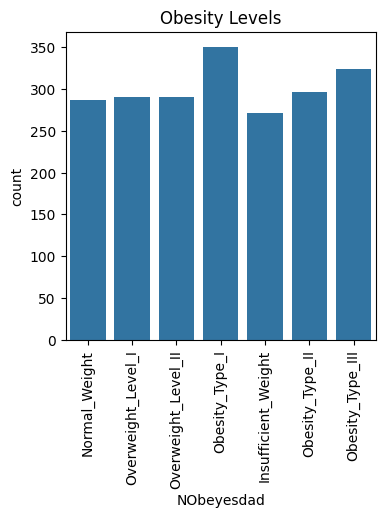

In [ ]:
# biểu đồ các biến mục tiêu (NObeyesdad)
plt.figure(figsize=(4, 4))
sns.countplot(x='NObeyesdad', data=data)
plt.title('Obesity Levels')
plt.xticks(rotation=90)
plt.show()

Hình ảnh trên là một biểu đồ cột thể hiện số lượng (count) của các mức độ béo phì (Obesity Levels) với các nhãn tương ứng trên trục hoành (NObeyesdad).
1. **Phân bố mức độ béo phì**:
   - Số lượng các mẫu cho các mức độ béo phì có vẻ khá đồng đều, với một số biến thể nhỏ.
   - **Obesity_Type_I** có số lượng lớn nhất (khoảng 350 mẫu), cho thấy đây là nhóm có nhiều người mắc nhất trong dữ liệu.
   - **Insufficient_Weight** có số lượng ít nhất, vào khoảng 250 mẫu, cho thấy ít người thuộc nhóm này hơn so với các nhóm khác.

2. **Phân loại khác nhau**:
   - Các nhóm khác như **Normal_Weight**, **Overweight_Level_I**, **Overweight_Level_II**, **Obesity_Type_II**, và **Obesity_Type_III** đều có số lượng mẫu gần tương đương nhau, trong khoảng 300-320 mẫu.

3. **Biểu đồ dễ hiểu**:
   - Biểu đồ cung cấp một cái nhìn trực quan về sự phân bố của các nhóm béo phì, cho thấy rằng dữ liệu có tính cân bằng khá tốt giữa các nhóm, ngoại trừ sự khác biệt rõ rệt của nhóm **Obesity_Type_I** và **Insufficient_Weight**.


In [ ]:
data.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
id,2111.0,1055.000000,609.537530,0.00,527.500000,1055.000000,1582.500000,2110.00
Gender,2111.0,0.505921,0.500083,0.00,0.000000,1.000000,1.000000,1.00
Age,2111.0,24.312600,6.345968,14.00,19.947192,22.777890,26.000000,61.00
Height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
FCVC,2111.0,2.419043,0.533927,1.00,2.000000,2.385502,3.000000,3.00
NCP,2111.0,2.685628,0.778039,1.00,2.658738,3.000000,3.000000,4.00
CH2O,2111.0,2.008011,0.612953,1.00,1.584812,2.000000,2.477420,3.00
FAF,2111.0,1.010298,0.850592,0.00,0.124505,1.000000,1.666678,3.00
TUE,2111.0,0.657866,0.608927,0.00,0.000000,0.625350,1.000000,2.00


## **TRAIN** **MODEL**

In [ ]:
# mã hóa biến mục tiêu thành các nhãn số
label_encoder = LabelEncoder()
data['NObeyesdad'] = label_encoder.fit_transform(data['NObeyesdad'])

In [ ]:
# phân chia dữ liệu thành các đặc trưng (features) và biến mục tiêu (target).
X = data.drop(columns=['NObeyesdad']) # Biến X sẽ chứa tất cả các đặc trưng (features) của dữ liệu mà không bao gồm biến mục tiêu.
y = data['NObeyesdad'] #  Biến y sẽ chứa các giá trị của biến mục tiêu 'NObeyesdad', mà mô hình sẽ học và dự đoán.

In [ ]:
# Danh sách này chứa các cột thuộc loại dữ liệu phân loại (categorical), là các cột có giá trị không phải số mà là các danh mục hoặc nhãn.
categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

# Danh sách này chứa các cột thuộc loại dữ liệu số (numerical), là các cột có giá trị số mà có thể là số nguyên hoặc số thực.
numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [ ]:
# chia dữ liệu thành các tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
numeric_transformer = Pipeline(steps=[
      ('scaler', StandardScaler())
  ])

categorical_transformer = Pipeline(steps=[
      ('onehot', OneHotEncoder(handle_unknown='ignore'))
  ])

preprocessor = ColumnTransformer(
      transformers=[
          ('num', numeric_transformer, numerical_features),
          ('cat', categorical_transformer, categorical_features)
      ])

In [ ]:
#định nghĩa mô hình LGBM
lgbm_model = LGBMClassifier()

In [ ]:
# Định nghĩa các siêu tham số cho tìm kiếm ngẫu nhiên
param_grid = {
    'classifier__n_estimators': [100, 200, 300, 400, 500],
    'classifier__max_depth': [3, 5, 7, 9, 11],
    'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'classifier__subsample': [0.5, 0.7, 0.9, 1.0],
    'classifier__colsample_bytree': [0.5, 0.7, 0.9, 1.0],
    'classifier__min_child_samples': [10, 20, 30, 40, 50],
    'classifier__reg_alpha': [0.0, 0.1, 0.5, 1.0],
    'classifier__reg_lambda': [0.0, 0.1, 0.5, 1.0],
    'classifier__min_child_weight': [1e-3, 1e-2, 0.1, 1, 10]
}

In [ ]:

from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Định nghĩa pipeline (chuỗi các bước xử lý)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Bước tiền xử lý dữ liệu
    ('classifier', lgbm_model)  # Bước sử dụng mô hình LGBM để phân loại
])

# Phần còn lại của mã RandomizedSearchCV vẫn giữ nguyên
random_search = RandomizedSearchCV(pipeline, param_distributions=param_grid,
                                   n_iter=50,  # Số lần thử nghiệm các bộ tham số ngẫu nhiên
                                   cv=3,  # Số lần chia dữ liệu thành các tập con cho quá trình cross-validation
                                   verbose=2,  # Mức độ chi tiết của thông tin đầu ra trong quá trình tìm kiếm
                                   random_state=42,  # Đảm bảo kết quả có thể tái tạo
                                   n_jobs=-1)  # Sử dụng tất cả các nhân CPU khả dụng để tính toán
random_search.fit(X_train, y_train)  # Huấn luyện pipeline với dữ liệu huấn luyện


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000494 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2078
[LightGBM] [Info] Number of data points in the train set: 1688, number of used features: 28
[LightGBM] [Info] Start training from score -2.056021
[LightGBM] [Info] Start training from score -2.015199
[LightGBM] [Info] Start training from score -1.821828
[LightGBM] [Info] Start training from score -1.954836
[LightGBM] [Info] Start training from score -1.866779
[LightGBM] [Info] Start training from score -1.975979
[LightGBM] [Info] Start training from score -1.950661
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['Age',
                                                                                'Height',
                                                                                'Weight',
                                                                                'FCVC',
                                                                                'NCP',
                                                                                'CH2O',
                                                                                'FAF',
                                                                                'TUE']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('onehot',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['Gender',
                                                                                'family_history_with_overweight',
                                                                                'FAVC',
                                                                                'CAEC',
                                                                                'SMOKE',...
                                                                      0.2,
                                                                      0.3],
                                        'classifier__max_depth': [3, 5, 7, 9,
                                                                  11],
                                        'classifier__min_child_samples': [10,
                                                                          20,
                                                                          30,
                                                                          40,
                                                                          50],
                                        'classifier__min_child_weight': [0.001,
                                                                         0.01,
                                                                         0.1, 1,
                                                                         10],
                                        'classifier__n_estimators': [100, 200,
                                                                     300, 400,
                                                                     500],
                                        'classifier__reg_alpha': [0.0, 0.1, 0.5,
                                                                  1.0],
                                        'classifier__reg_lambda': [0.0, 0.1,
                                                                   0.5, 1.0],
                                        'classifier__subsample': [0.5, 0.7, 0.9,
                                                                  1.0]},
                   random_state=42, verbose=2)

In [ ]:
# Get the best parameters
best_params = random_search.best_params_
best_model = random_search.best_estimator_

In [ ]:
print("Best Parameters:")
for key, value in best_params.items():
    print(f"{key}: {value}")


Best Parameters:
classifier__subsample: 0.7
classifier__reg_lambda: 0.0
classifier__reg_alpha: 0.0
classifier__n_estimators: 100
classifier__min_child_weight: 0.001
classifier__min_child_samples: 30
classifier__max_depth: 9
classifier__learning_rate: 0.3
classifier__colsample_bytree: 1.0


In [ ]:
# Đánh giá mô hình
accuracy = best_model.score(X_test, y_test)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.9692671394799054


In [ ]:
# Mô hình tốt nhất trên toàn bộ tập dữ liệu
best_model.fit(X,y)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000406 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2077
[LightGBM] [Info] Number of data points in the train set: 2111, number of used features: 28
[LightGBM] [Info] Start training from score -2.049115
[LightGBM] [Info] Start training from score -1.995435
[LightGBM] [Info] Start training from score -1.794131
[LightGBM] [Info] Start training from score -1.961185
[LightGBM] [Info] Start training from score -1.874174
[LightGBM] [Info] Start training from score -1.985036
[LightGBM] [Info] Start training from score -1.985036
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Height', 'Weight',
                                                   'FCVC', 'NCP', 'CH2O', 'FAF',
                                                   'TUE']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'CAEC', 'SMOKE',
                                                   'SCC', 'CALC',
                                                   'MTRANS'])])),
                ('classifier',
                 LGBMClassifier(learning_rate=0.3, max_depth=9,
                                min_child_samples=30, subsample=0.7))])

In [ ]:
# chuẩn bị dữ liệu kiểm
test_data = pd.read_csv('updated_data.csv')

In [ ]:
# Thực hiện dự đoán trên dữ liệu kiểm tra
test_predictions = best_model.predict(test_data)

In [ ]:
# In danh sách các cột trong DataFrame test_data
print(test_data.columns)


Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


In [ ]:
# tạo submission dataframe
submission_df = pd.DataFrame({'id': test_data['id'],
                              'NObeyesdad': label_encoder.inverse_transform(test_predictions)})

In [ ]:
# tải submission dataframe to CSV
submission_df.to_csv('submission.csv', index=False)

In [ ]:
import joblib

In [ ]:
joblib.dump(best_model,'trained_model')

['trained_model']

In [ ]:
joblib.dump(label_encoder,'label_encoder')

['label_encoder']

In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 80.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 90.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.4/71.4 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 10.1 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing 

#**TEST MODEL**

In [ ]:
import joblib
import gradio as gr
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# "Tải bộ mã hóa nhãn cho biến mục tiêu (các mức độ tiểu đường)
label_encoder = LabelEncoder()
label_encoder.classes_ = pd.read_pickle('label_encoder')

# Tải mô hình đã lưu để dự đoán bệnh tiểu đường
best_model = joblib.load('trained_model')

def predict_diabetes_level(gender, age, height, weight, family_history, favc, fcvc, ncp, caec, smoke, ch2o, scc, faf, tue, calc, mtrans):
    # tạo dữ liệu đầu vào
    data = pd.DataFrame({
        'Gender': [gender],
        'Age': [age],
        'Height': [height],
        'Weight': [weight],
        'family_history_with_overweight': [family_history],
        'FAVC': [favc],  # Có ăn đồ ăn nhanh không
        'FCVC': [fcvc], # Tiêu thụ rau củ quả hàng ngày
        'NCP': [ncp], # Số bữa ăn hàng ngày
        'CAEC': [caec],  # Thói quen ăn giữa các bữa chính
        'SMOKE': [smoke],  # Hút thuốc lá hàng ngày
        'CH2O': [ch2o], # Tiêu thụ nước hàng ngày
        'SCC': [scc],  # Theo dõi calo hàng ngày không
        'FAF': [faf], # Hoạt động thể chất hàng tuần
        'TUE': [tue],  # Thời gian sử dụng công nghệ hàng ngày
        'CALC': [calc],  # Tần suất tiêu thụ rượu
        'MTRANS': [mtrans]  # Phương thức di chuyển hàng ngày
    })

    # Thực hiện dự đoán bằng cách sử dụng mô hình đã tải.
    prediction = best_model.predict(data)

    # trả về mức độ tiểu đường dự đoán
    return label_encoder.inverse_transform(prediction)[0]

# Tạo giao diện Gradio để dự đoán mức độ tiểu đường.
iface = gr.Interface(
    fn=predict_diabetes_level,
    inputs=[
        gr.Dropdown(['Male', 'Female'], label="Gender"),
        gr.Number(label="Age"),
        gr.Number(label="Height"),
        gr.Number(label="Weight"),
        gr.Dropdown(['yes', 'no'], label="family_history_with_overweight"),
        gr.Dropdown(['yes', 'no'], label="FAVC"),
        gr.Number(label="FCVC"),
        gr.Number(label="NCP"),
        gr.Dropdown(['no', 'Sometimes', 'Frequently', 'Always'], label="CAEC"),
        gr.Dropdown(['no', 'yes'], label="Smoke"),
        gr.Number(label="CH2O"),
        gr.Dropdown(['no', 'yes'], label="SCC"),
        gr.Number(label="FAF"),
        gr.Number(label="TUE"),
        gr.Dropdown(['no', 'Sometimes', 'Frequently', 'Always'], label="CALC"),
        gr.Dropdown(['Automobile', 'Bike', 'Motorbike', 'Public_Transportation', 'Walking'], label="MTRANS"),
    ],
    outputs="text",
    title="Dự đoán mức độ tiểu đường "
)

# khởi chạy giao diện
iface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://b7667b1df10a2f3107.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
